## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

In [2]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [3]:
uber_data

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
673,ce5bdea8e9c366b2f9f9cdf1bb879965,0:10:37,0:12:00,0:01:23,161,2.60,5.79,6,4,0.39,2.57,0.18
674,3a1df88ce67d8f749ac5f09da8b4dadf,0:23:41,0:37:00,0:13:19,241,3.92,11.46,7,3,0.62,5.37,0.48
675,1879ce44367d4cc555479253323ec36d,0:16:20,0:35:00,0:18:40,174,2.78,6.68,8,6,0.76,4.02,0.9
676,7a237cb245b6ca854498ecb7c842beb3,0:19:19,0:23:00,0:03:41,209,3.33,7.48,9,7,0.68,4.28,0.79


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [4]:
# answer goes here
x = ['trip_time', 'total_time', 'wait_time']
def time_convert(data, column):
  timedelta = pd.to_timedelta(data[column]) 
  time_minutes = timedelta / pd.Timedelta("1 minute")
  uber_data[column] = time_minutes
for column in x:
  time_convert(uber_data, column)

uber_data


,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.550000,29.0,7.450000,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.450000,26.0,6.550000,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883333,83.0,16.116667,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.616667,20.0,6.383333,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.900000,49.0,10.100000,665,13.43,21.92,3,1,0.90,1.61,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
673,ce5bdea8e9c366b2f9f9cdf1bb879965,10.616667,12.0,1.383333,161,2.60,5.79,6,4,0.39,2.57,0.18
674,3a1df88ce67d8f749ac5f09da8b4dadf,23.683333,37.0,13.316667,241,3.92,11.46,7,3,0.62,5.37,0.48
675,1879ce44367d4cc555479253323ec36d,16.333333,35.0,18.666667,174,2.78,6.68,8,6,0.76,4.02,0.9
676,7a237cb245b6ca854498ecb7c842beb3,19.316667,23.0,3.683333,209,3.33,7.48,9,7,0.68,4.28,0.79


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

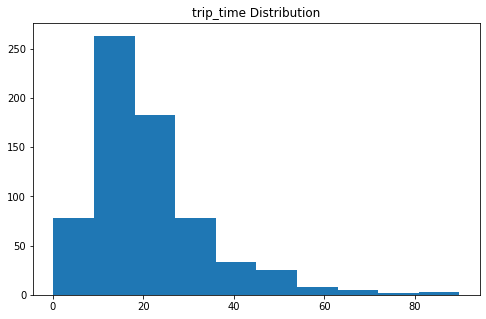

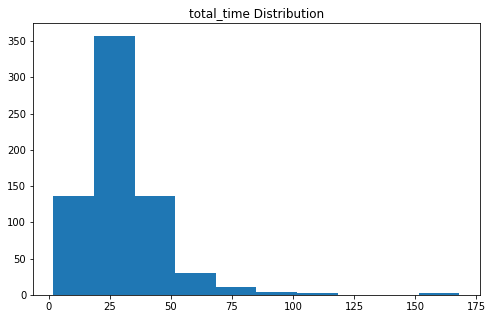

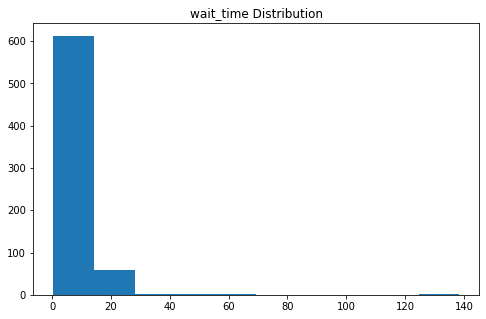

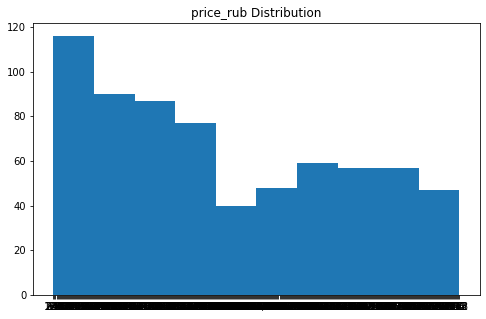

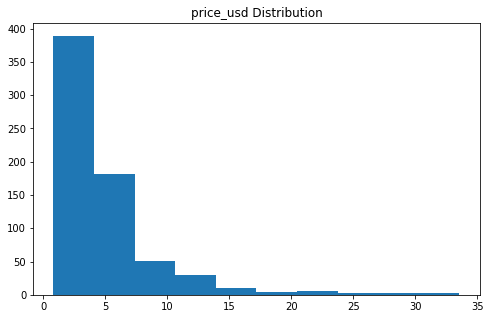

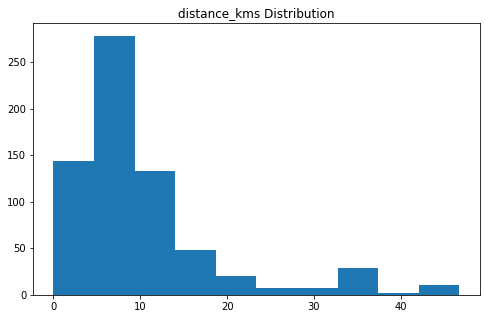

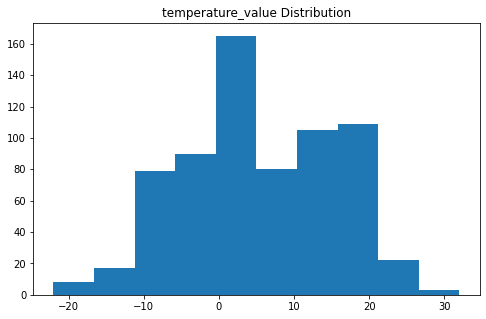

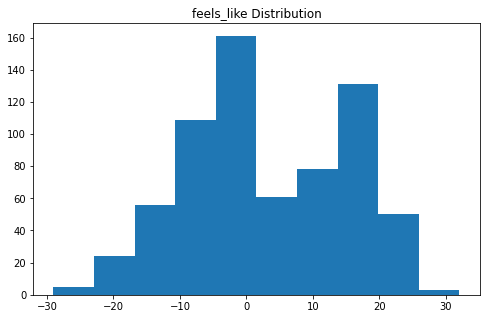

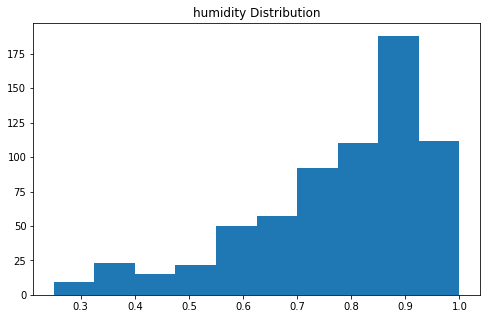

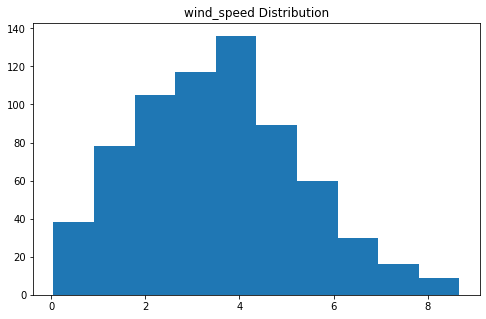

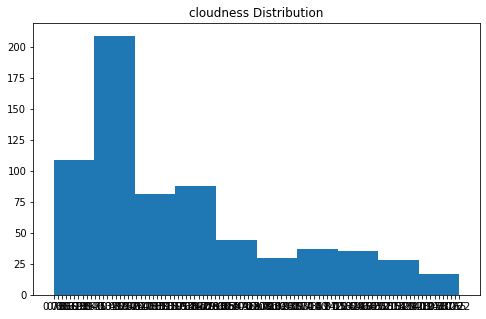

In [29]:

def draw_histograms(df, variables, n_rows, n_cols):
  
  for i, var_name in enumerate(variables):
      fig=plt.figure(figsize=(8,5))
      #ax=fig.add_subplot(n_rows,n_cols,i+1)
      df[var_name].hist()
      plt.title(var_name+" Distribution")
      plt.grid(b= None)
  plt.show()

draw_histograms(uber_data.loc[:, uber_data.columns != 'trip_uid'], uber_data.loc[:, uber_data.columns != 'trip_uid'].columns, 3, 4)

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

In [46]:
# answer goes here
q75, q25 = np.percentile(uber_data["trip_time"], [75 ,25])
iqr = q75 - q25
threshold = 1.5

min_val = q25 - (iqr*threshold) 
max_val = q75 + (iqr*threshold) 
len((np.where((uber_data['trip_time']>max_val) | (uber_data['trip_time']<min_val))[0]))


uber_data.loc[(uber_data['trip_time']>max_val) | (uber_data['trip_time']<min_val)]




,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883333,83.0,16.116667,644,13.01,18.01,14,14,0.61,5.25,0.86
13,36695e9088a840d3f7476e86294aa846,50.216667,64.0,13.783333,228,4.20,9.41,29,31,0.63,5.11,0.75
29,72801dd197d168a38ebaa88875492d60,68.066667,88.0,19.933333,1500,27.29,21.22,16,16,0.66,5.75,0.62
45,f981dcaa5c7120490cdd38357b78c79c,48.216667,57.0,8.783333,1800,33.55,19.14,15,15,0.41,5.95,0.46
47,e4004a6b46e6e1556f76f63f295a3f37,62.016667,77.0,14.983333,593,10.46,15.63,14,14,0.91,4.70,0.79
79,51785bfdf539132f5304a7ae1e1a6d9e,53.216667,60.0,6.783333,518,7.84,13.78,16,16,0.67,4.67,0.75
106,176e430aa7aafb4472cb09677d05fc2b,51.050000,57.0,5.950000,1000,15.43,36.50,9,6,0.65,4.82,0.31
108,22f1e9c384f584cf65c51555e5428703,85.316667,103.0,17.683333,1000,16.00,46.04,-3,-3,0.97,0.95,0.18
117,ab98f8918dff094689ae1657dadb6bbd,71.200000,81.0,9.800000,669,10.17,17.32,-2,-7,0.75,4.86,0.84
201,5383e6be5bc4f5edc74d2a22a422e30f,47.966667,57.0,9.033333,349,5.28,9.54,21,21,0.82,2.64,0.8


There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

{'boxes': [<matplotlib.lines.Line2D at 0x7f9fb45fb0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9fb45fbe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9faa883630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9faa883668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9fb45fb9e8>,
  <matplotlib.lines.Line2D at 0x7f9fb45fb7b8>]}

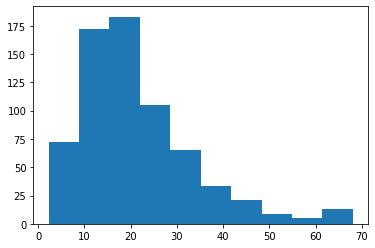

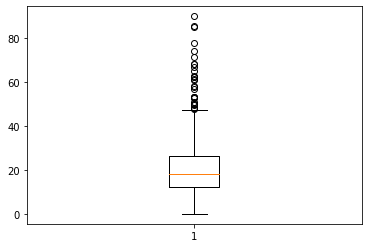

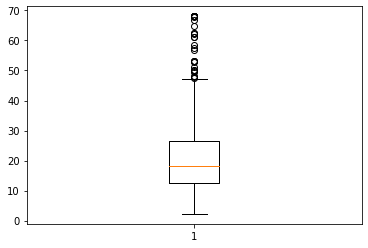

In [44]:
# answer goes here

winsorized_views = winsorize(uber_data["trip_time"], 0.01) 
winsorized_views

plt.hist(winsorized_views)

plt.figure()
plt.boxplot(uber_data['trip_time'])

plt.figure()
plt.boxplot(winsorized_views)

